# Tutoriel Iterative Multi-Scale Dynamic Time Warping(IMs-DTW)

## Présentation de problème:

La compréhension de la variabilité des précipitations présente un enjeu majeur lié au domaine de la météo et du climat. Une façon de faire est de comparer les mesures sur différentes stations pour une variabilité spatiale ou comparer des séries temporelles sur deux périodes différentes pour la variabilité temporelle. l'IMS-DTW est un outil développé par l'équipe SPACE adapté à la comparaison des séries temporelles des précipitations. ce tutoriel illustre la problématique liée à la comparaison des séries temporelles de précipitations, présente la méthode, son application et les principaux résultats:    

Dans cette présentation, on compare deux séries temporelles de précipitations mesurées sur les deux stations (Trappes, Villacourblay) en 2015 avec un pas d'echantillonage de $l=6 min$:

In [1]:
import numpy as np
import IMSDTW
import matplotlib.pyplot as plt
from IPython.display import Image
import time
import IMS_Tools
%matplotlib inline

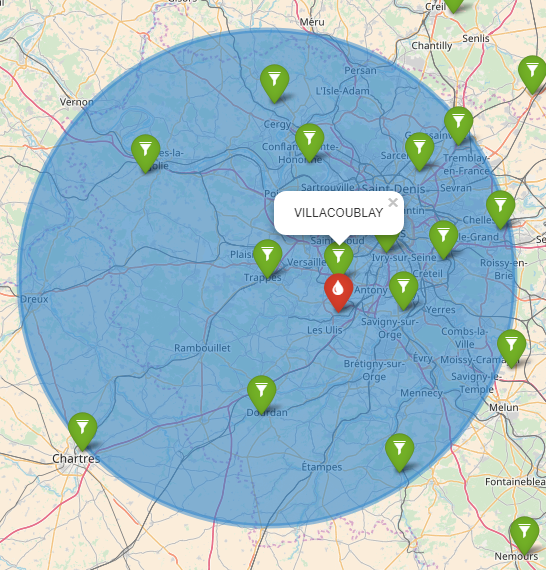

In [17]:
Image(filename='vel.png',height=400,width=700)

                         Figure1: réseaux pluviomètre météo France 

In [6]:
Serie= IMS_Tools.read_file('donnees_trappes_villacoublay_2015')

Pour les exemples suivants, on focalise l'étude sur les séries temporelles de précipitations de 128 enregistrements mesurées le 28 mars 2015 entre 02:00 et 14:42 .

In [4]:
#on spécifie la date de début et de fin 
date_debut=[2015,3,28,2,0]
date_fin=[2015,3,28,14,42]
X,Y = IMS_Tools.choose_TS(date_debut,date_fin,Serie) # echantillonage de la série en fonction de date_debut et date_fin

Visualisation des séries

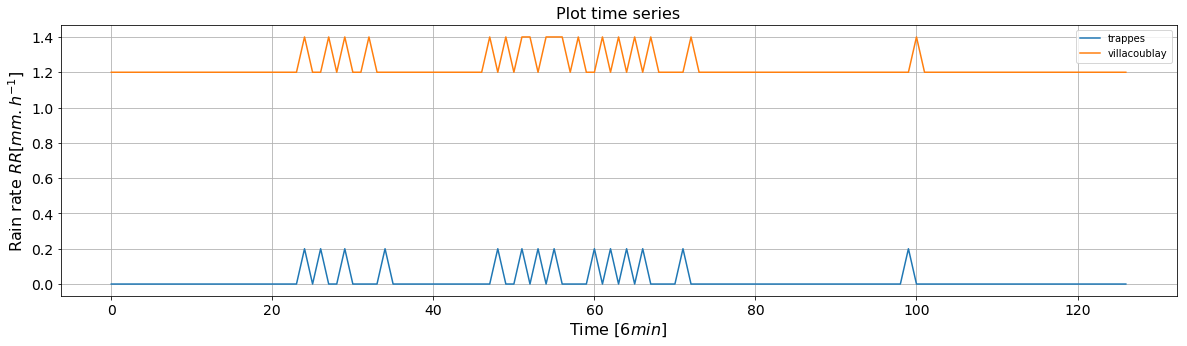

In [4]:
plt.figure(figsize=(20,5))
IMS_Tools.plot_TS(X,Y)
plt.grid()

<strong>Commentaire :</strong> les deux séries sont légèrement décalées. par exemple, le $99^{ème}$ echantillon sur la série de Trappes peut etre associé au $100^{ème}$ echantillon sur la série de Villacoublay. Ce déclage est dû à la distance entre les deux villes (14.32KM)

à fin de montrer l'intéret de l'IMS-DTW pour cette problématique de comparaison , on présente d'abord la distance euclidienne qui servira par la suite de référence à notre travail 

## 1) Distance euclidienne :

La comparaison de deux séries X et Y peut se faire en utilisant la distance euclidienne qui compare les deux séries point à point. on rappelle la formaule de la distance euclidienne :

 $$d(X,Y) = \sqrt{ \sum_{i=1}^{N} (x_{i}-y_{i})^2}$$

Pour pouvoir comparer des distances calculées sur des séreis de longueurs N on normalise la distance par les longueurs des séries comparées. la formule de la distance euclidienne normalisée est :

$$d(X,Y) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_{i}-y_{i})^2}$$

On clacul de la distance euclidienne entre TRAPPES et VILLACOUBLAY et on sauvegarde le chemin de comparaison des points [point à point] dans path_euclidienne: 

In [5]:
distance_euclidienne, path_euclidienne= IMS_Tools.NED(X,Y)
print("la distance euclidienne normalisée:",np.round(distance_euclidienne,2))

la distance euclidienne normalisée: 0.09


Affichage de la comparaison  : le chemin de comparaison suivi par la distance euclidienne est illustré par les lignes grises: 

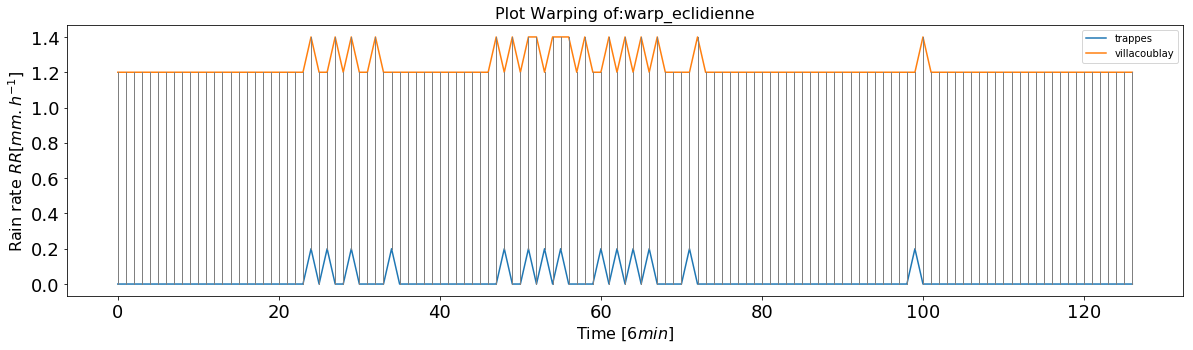

In [6]:
plt.figure(figsize=(20,5))
IMS_Tools.plot_warp(X,Y,"warp_eclidienne",path_euclidienne)

Pour qu'on puisse voir clairement ce qui se passe on va faire un zoom sur l'affichage entre 60 et 80

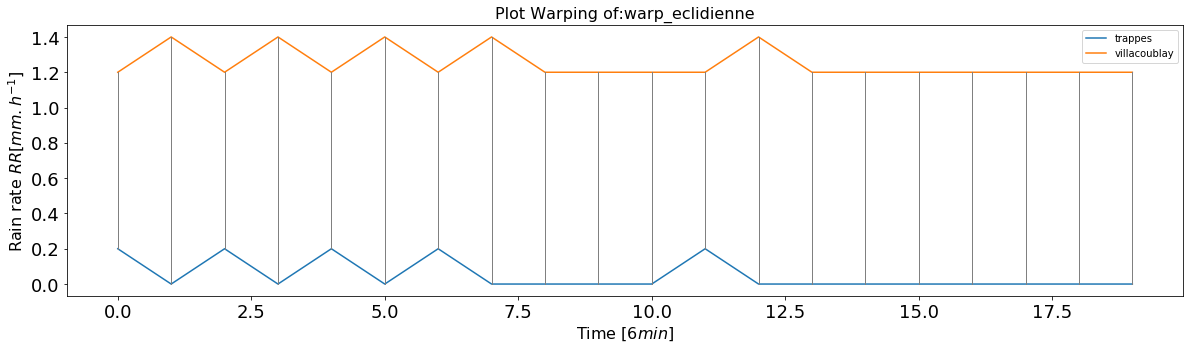

In [7]:
path_zoom=[]
X_zoom = X[60:80]
Y_zoom = Y[60:80]
for i in range(max(len(X_zoom),len(Y_zoom))):
    path_zoom.append([i,i])
plt.figure(figsize=(20,5))
IMS_Tools.plot_warp(X_zoom,Y_zoom,"warp_eclidienne",path_zoom)

<strong> Commentaire :</strong> La distance euclidienne ne donne pas une bonne comparaison parce qu'elle ne prend pas en compte le décalage temporel et elle fait une comparaison point à point des deux séries. c'est à dire elle associe des événements de pluie a zero malgré le déclage temporel est très faible.

<strong> Idée :</strong> on propose de comparer en considérant une déformation élastique des deux axes du temps. cette reflexion etait prposé pour la première fois sous le nom l'algorithme DTW (Dynamic Time Warping)[ref].

## 2) Dynamic Time Warping DTW :

La particularité de la méthode Dynamic Time Warping (DTW ) ou déformation dynamique temporelle, est de savoir gérer les décalages temporels qui peuvent éventuellement exister entre deux séries. Au lieu de comparer chaque point d’une série avec celui de l’autre série qui intervient au même instant t, on permet à la mesure de comparer chaque point d’une série avec un ou plusieurs points de l’autre série, ceux-ci pouvant être décalés dans le temps. 

soient X et Y les deux séries à comparer avec $X = x_1,\ldots,x_i,\ldots,x_{N_X}$ et $Y = y_1,\ldots,y_j,\ldots,y_{N_Y}$, le décalage considéré peut avoir la forme d'une fonction de correspondances qu'on appelle warping path et on note $P$ [1]:

$$P(X,Y)=p_1,p_2,...p_k,...,p_K$$
avec
$$p_k=(i_k,j_k)$$

En considérant al déformation des axes du temps, la mesure de dissimilarité $d_{DTW}$ est définie par :

$$d_{DTW}(X,Y) = min[\sqrt{\frac{2}{(N_X+N_Y)} \sum_{k=1}^{K} (x_{i_k}-y_{j_k})^2}]$$
avec 
$$p_k=(i_k,j_k)$$ et $$P(X,Y)=p_1,p_2,...p_k,...,p_K$$
et
$$ P(X,Y)= Argmin [\sum_{k=1}^{K} (x_{i_k}-y_{j_k})^2]$$

La recherche du chemin optimal (path $P_{DTW}$) solution du problème précédent se fait traditionnellement par programmtion dynamique. la fonction associée est $IMSDTW.\_dtw$ :

In [8]:
start_time = time.time()
distance_DTW, path_DTW = IMSDTW.___dtw(X,Y,None,IMSDTW.__difference)
Time_dtw=np.round(time.time()-start_time,2)

le temps de calcul avec l’algorithme DTW:  0.46 s


In [9]:
print("la distance avec DTW:",np.round(distance_DTW,2))
print("la distance euclidienne normalisée:",np.round(distance_euclidienne,2))

la distance avec DTW: 0.02
la distance euclidienne normalisée: 0.09


On constate que : 

$$d_{DTW}<d_{ED} $$

<strong> Commentaire : </strong> La dissimilarité calculée par la DTW est plus faible comparée à la distance euclidienne normalisée

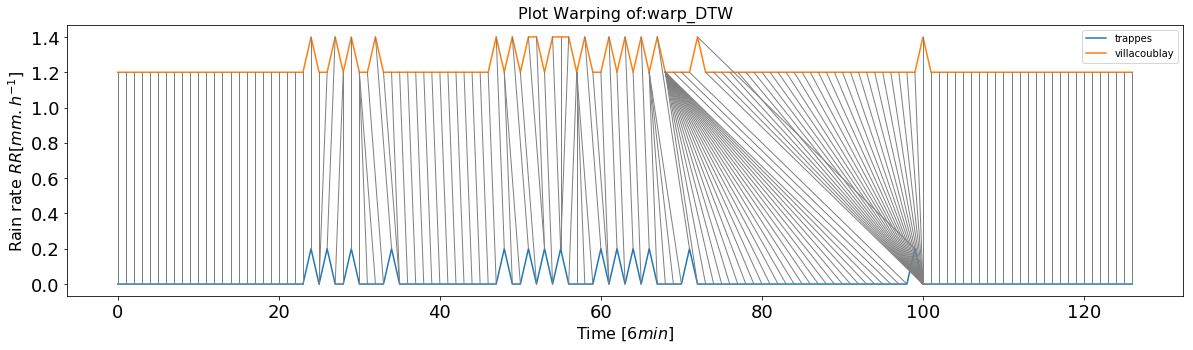

In [10]:
#affichage des correspondances temporelles 
plt.figure(figsize=(20,5))
IMS_Tools.plot_warp(X,Y,"warp_DTW",path_DTW)

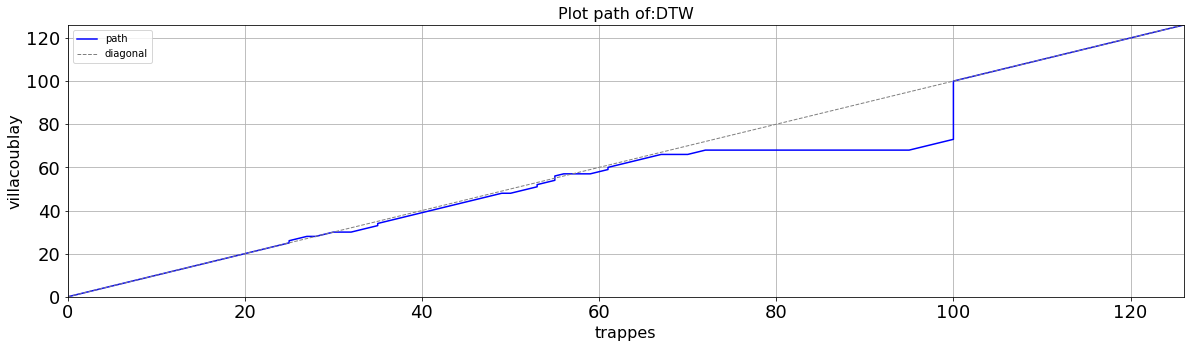

In [11]:
#affichage de warping path de DTW
plt.figure(figsize=(20,5))
IMS_Tools.plot_path('DTW',path_DTW)

<strong> Commentaire : </strong> On remarque que  la Dynamic Time Warping (DTW) ne donne pas des correspondances acceptables sur les séries de pluie parce qu'elle associe des éventements visiblement indépendants - très loins dans l'axe de temps - .   En cherchant le minimum global, la DTW trouve un path loin de path diagonal et cela n'est pas favorable pour l'étude de la variabilité des précipitations exemple : entre 80 et 100 .

<strong> Idée : </strong> Pour avoir des correspondances qui respecte les propriétés de la pluie, on propose de faire une comparaison multi-échelles.  
Avec la méthode $\textit {Iterative Multi-Scale Dynamic Time Warping(IMs-DTW)}$ ,on utilise le path à l'échelle précèdent pour définir une contrainte sur la recherche du path suivant de façon itérative jusqu’à l’échelle le plus fine.

## 3) Iterative Multi-Scale Dynamic Time Warping(IMs-DTW):

L'algorithme IMSDTW utilise une approche multi-échelles avec trois opérations clés:

   1) Grossissement : Réduire une série temporelle en une série temporelle plus petite qui représente la même courbe aussi précisément que possible avec moins de points de données.

   2) Projection : Trouver un chemin de distorsion de dissimilarité minimale à une résolution grossière, et utiliser ce chemin de déformation comme estimation initiale pour le chemin de distorsion de dissimilarité minimale d'une résolution plus fine.

   3) Raffinement : Affiner le chemin de la chaîne projeté à partir d'une résolution grossière grâce à des ajustements locaux du chemin de la chaîne.

La méthode IMS-DTW peut être paramétrée par le rayon qui tracuit le nombre de cases autorisées en plus des cases du path projeté.

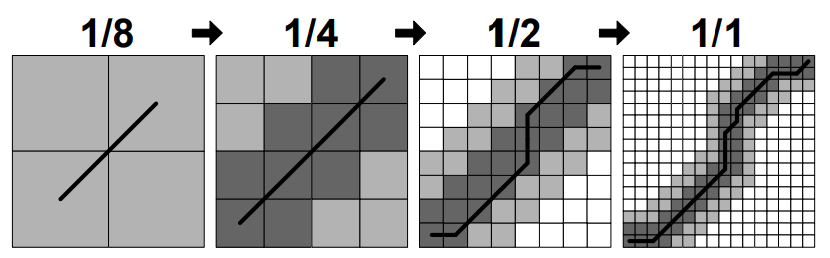

In [20]:
Image(filename='rayon.PNG',height=400,width=700)

                    Figure2 : path avec un rayon 1

Rayon = 0 : les cases de couleurs foncées  
Rayon = 1 : les cases de couleurs foncées + celles de couleurs claires 

### 3.1) calculer la dissimilarité avec IMSDTW rayon=0

Lorsque on utilise un rayon=0 on n'autorise pas le path a trop s'éloigner de la diagonale et on favorise vraiment le retour du path à la diagonale lors des périodes de non pluie 

#### Calcul sans l'affichage des étapes intermédiaires(multi-échelles):

In [35]:
# la fonction iddtw avec trois arguments retourne la mesure de dissimilarité et le path à l'echelle fine.
start_time = time.time()
distance_IMSDTW_r0, path_IMSDTW_r0 =  IMSDTW.iddtw(X,Y,radius=0)
Time_IMSr0=np.round(time.time()-start_time,2)
print("la distance avec l’algorithme IMSDTW avec rayon = 0 :",np.round(distance_IMSDTW_r0,2))

le temps de calcul avec l’algorithme IMSDTW avec rayon = 0 :  0.03 s


#### Calcul en affichant les étapes intermédiaires(multi-échelles):

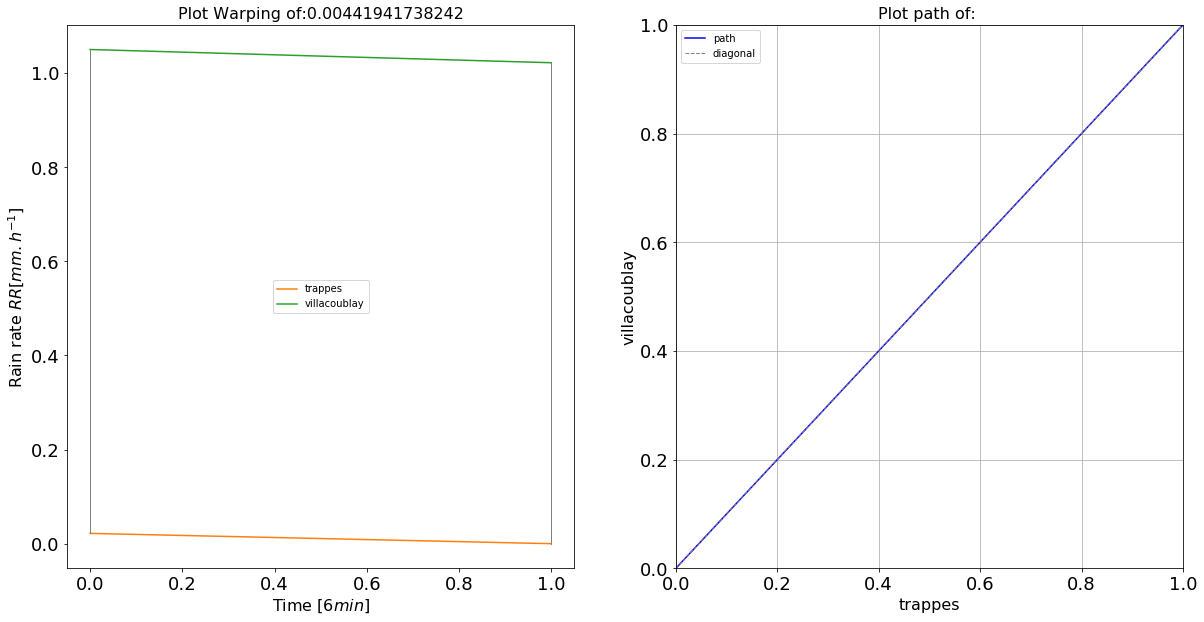

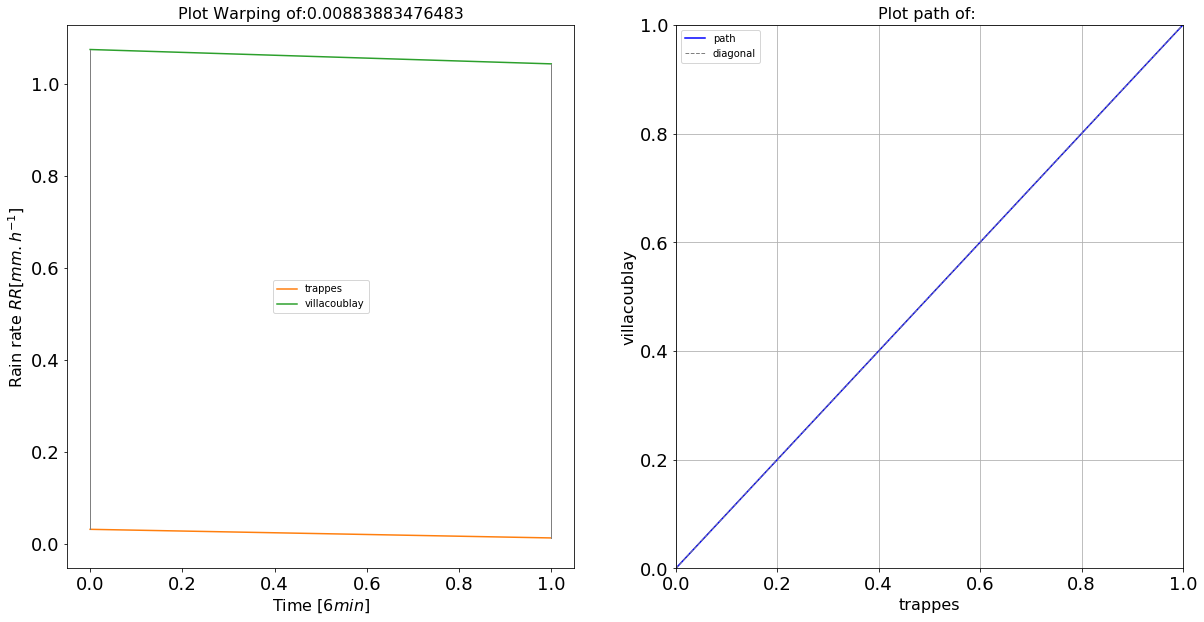

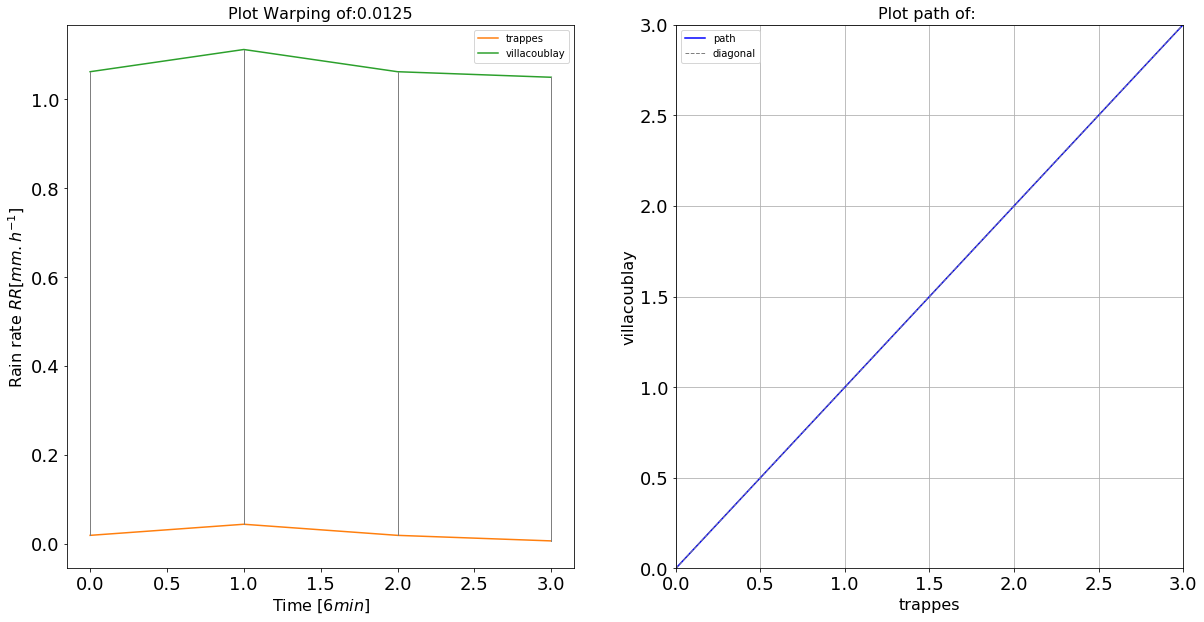

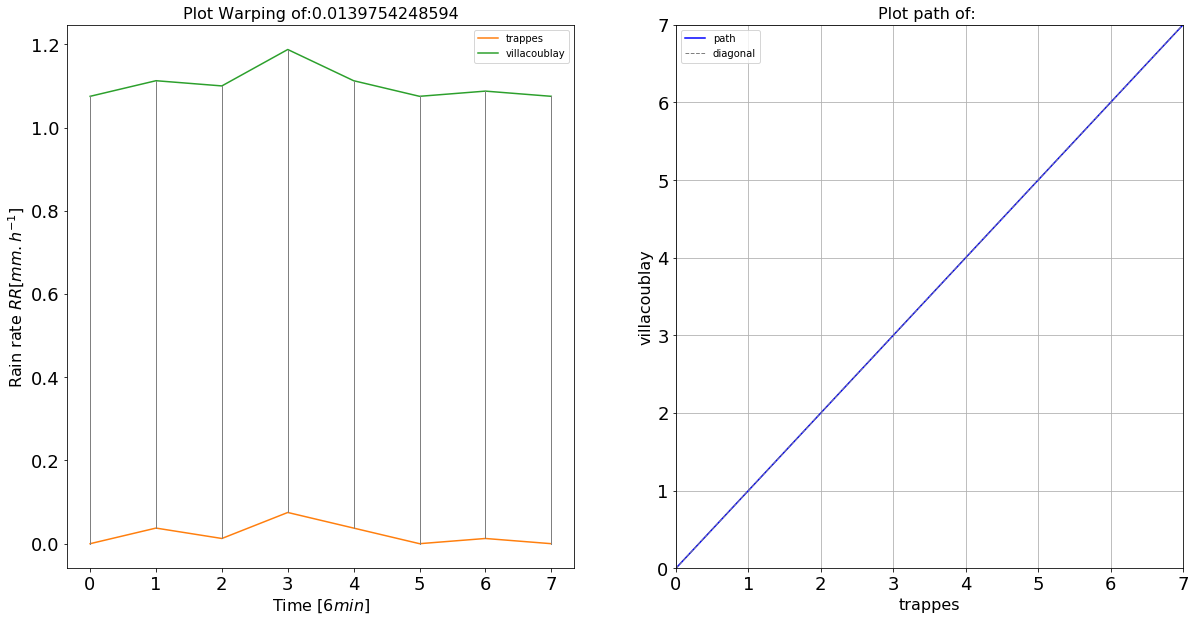

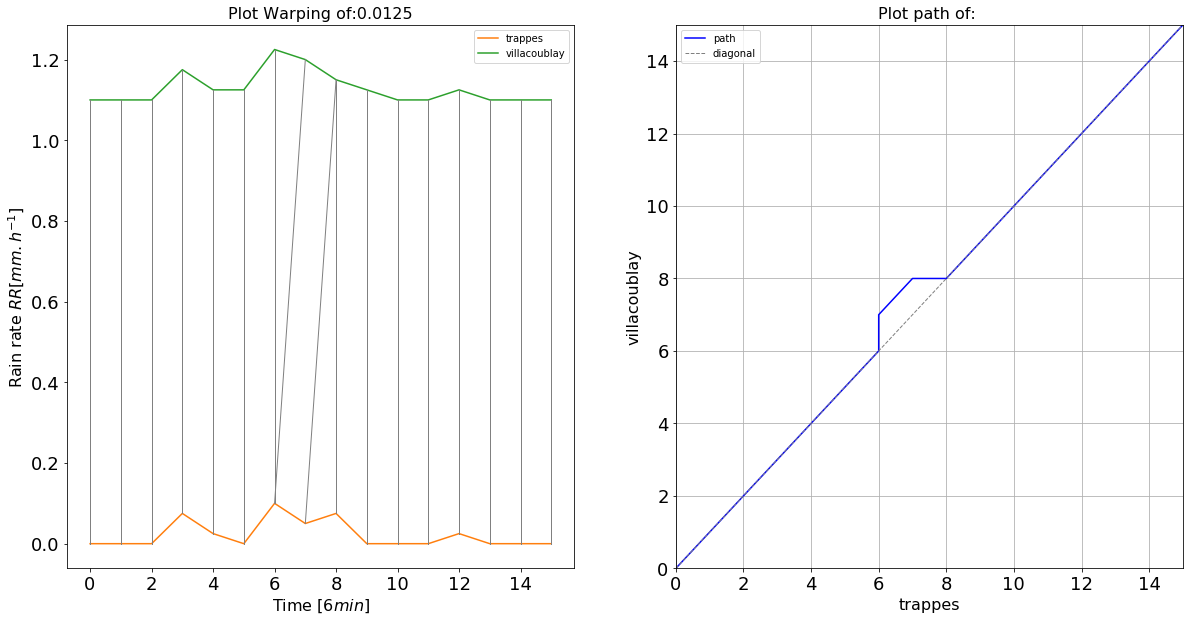

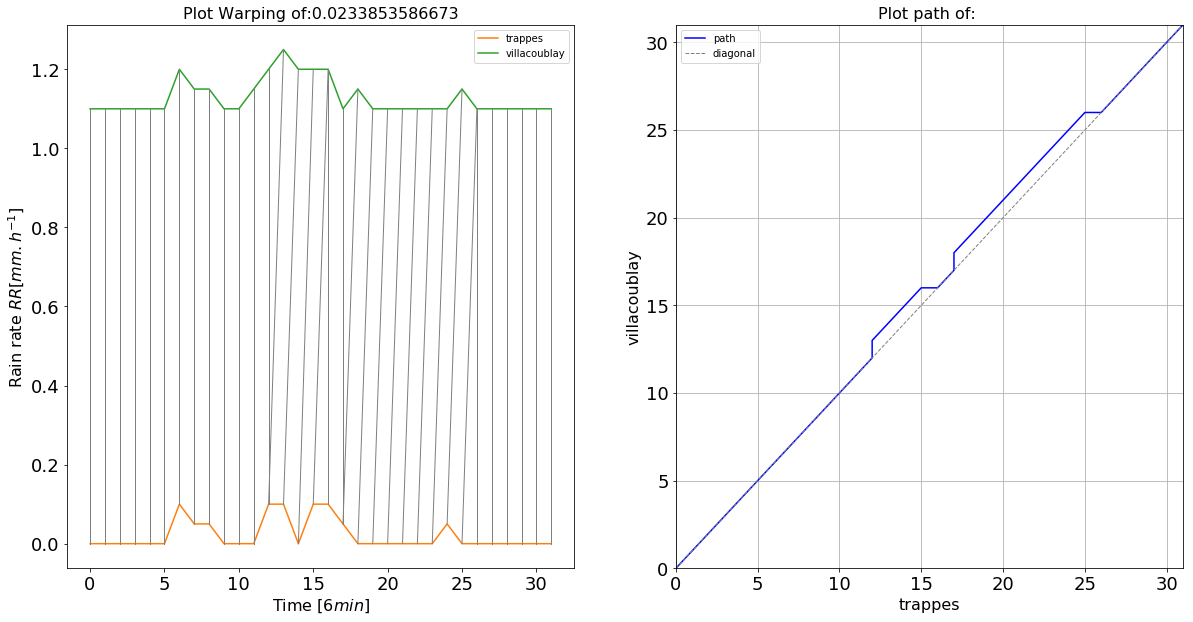

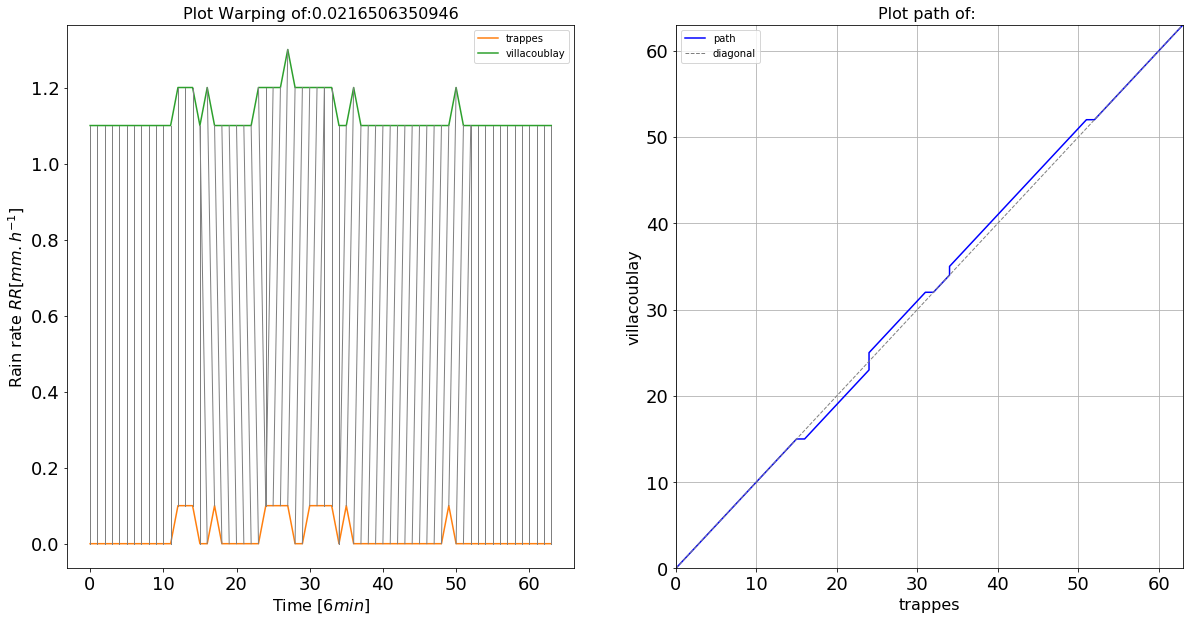

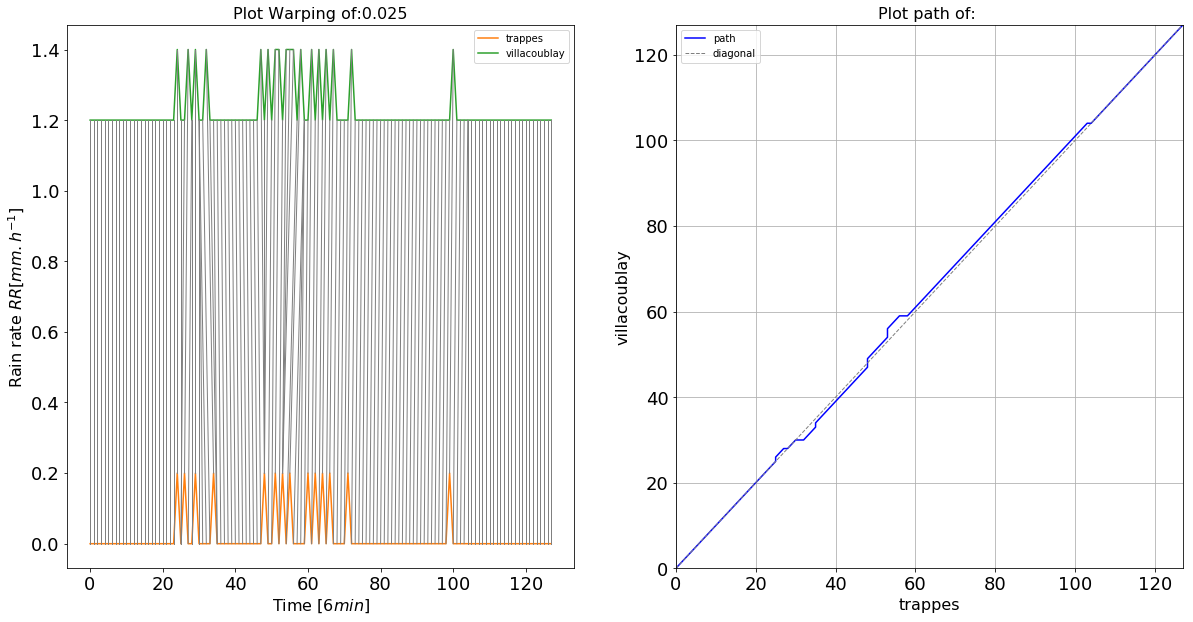

In [5]:
# l'appel de la fonction iddtw avec 5 arguments en spécifiant plot_links=True,plot_path=True, 
# affiche la dissimilarité à différentes échelles  
# de plus elle retourne la mesure de dissimilarité et le path à l'echelle fine.
distance_IMSDTW_r0, path_IMSDTW_r0 =  IMSDTW.iddtw(X,Y,radius=0,plot_links=True,plot_path=True)

#### Discussion des résultats de l'IMSDTW avec r=0

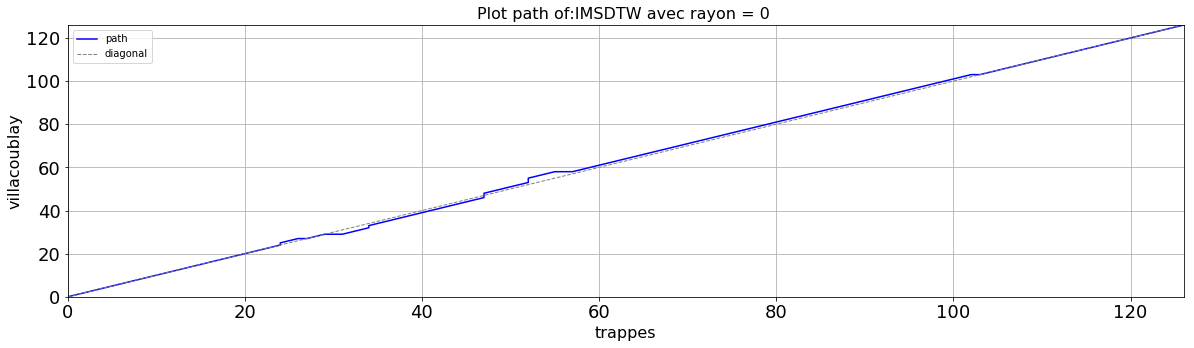

In [16]:
#affichage du path
plt.figure(figsize=(20,5))
IMS_Tools.plot_path("IMSDTW avec rayon = 0 ",path_IMSDTW_r0)

Le path trouvé est plus court et plus prche de la diagonale que celui trouvé par la DTW  

#### visualisation des correspondances:

Une façon de discuter les associations proposées dans le path est la visualisation des séries liées.

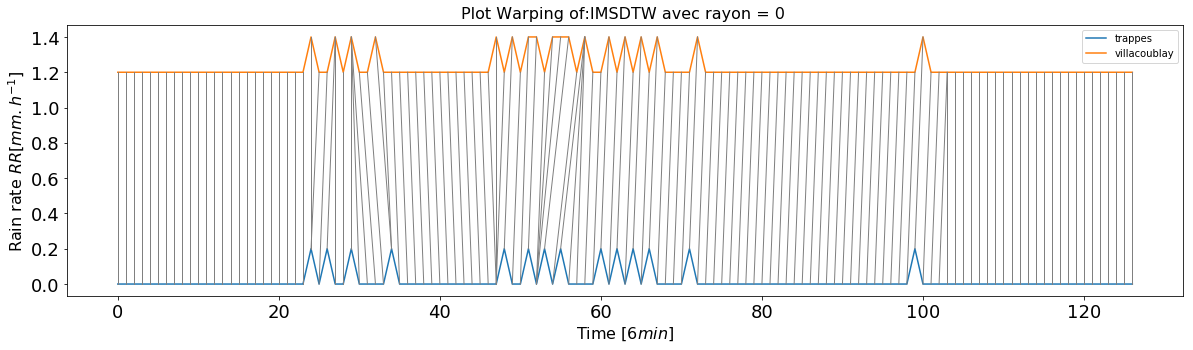

In [15]:
# affichage des correspondances
plt.figure(figsize=(20,5))
IMS_Tools.plot_warp(X,Y,"IMSDTW avec rayon = 0 ",path_IMSDTW_r0)

<strong> Commentaire : </strong> l'utilisation de l'IMSDTW avec un rayon=0 nous a permi de trouver un path acceptable qui lie les évènements des deux séries.

#### La dissimilarité:

In [14]:
print("la dissimilarté avec l’algorithme IMSDTW avec rayon = 0 :",np.round(distance_IMSDTW_r0,2))

la distance avec l’algorithme IMSDTW avec rayon = 0 : 0.03


La IMSTW avec rayon=0 on a trouvé un path plus court et plus proche de la diagonale que celui trouvé par la DTW avec une dissimilarité faible. 

### 3.2) calcul de la dissimilarité avec IMSDTW rayon=1

Testons Le rayon r=1 : on autorise l'eloignement du path de la projection du path à l'echelle précédente avec une case en plus à chaque itération.  
<strong>But :</strong> analyser le risque de ne pas contraindre le path

#### Calcul sans l'affichage des étapes intermédiaires(multi-échelles):

In [41]:
# la fonction iddtw avec trois arguments (première série, deuxième série , et le rayon Radius) retourne la mesure de dissimilarité et le path à l'echelle fine.
start_time = time.time()
distance_IMSDTW_r1, path_IMSDTW_r1 =  IMSDTW.iddtw(X,Y,radius=1)
Time_IMSr1 = np.round(time.time()-start_time,2)
print("la dissimilarité avec l’algorithme IMSDTW avec rayon = 1 : ",np.round(distance_IMSDTW_r1,2))

le temps de calcul avec l’algorithme IMSDTW avec rayon = 1 :  0.07 s


#### Calcul en affichant les étapes intermédiaires(multi-échelles):

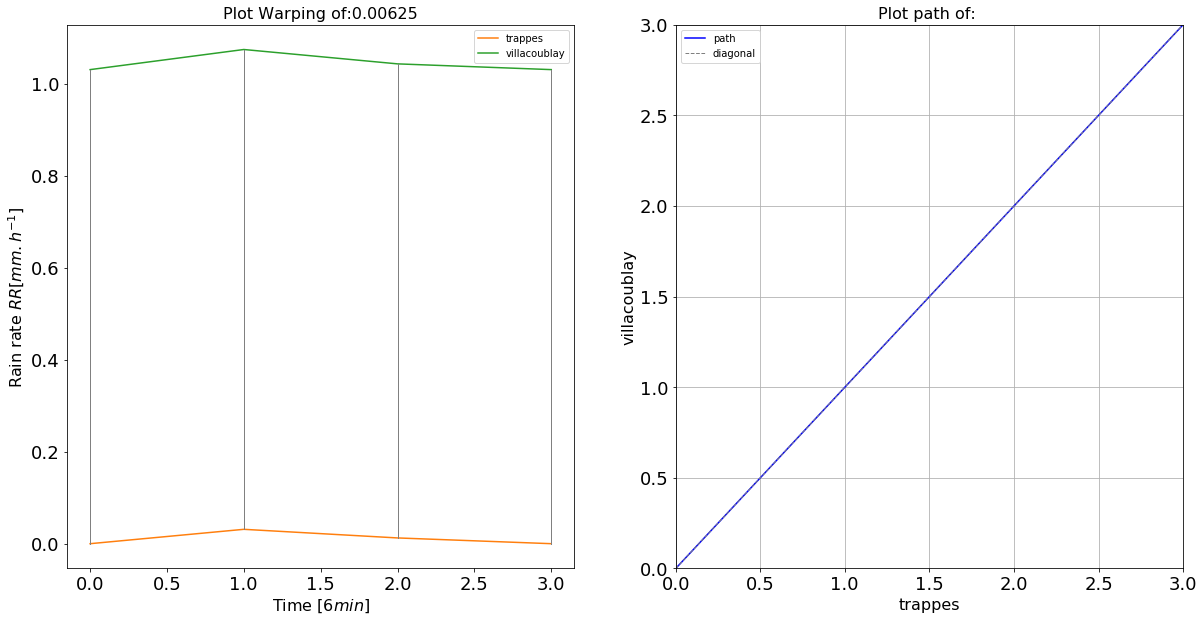

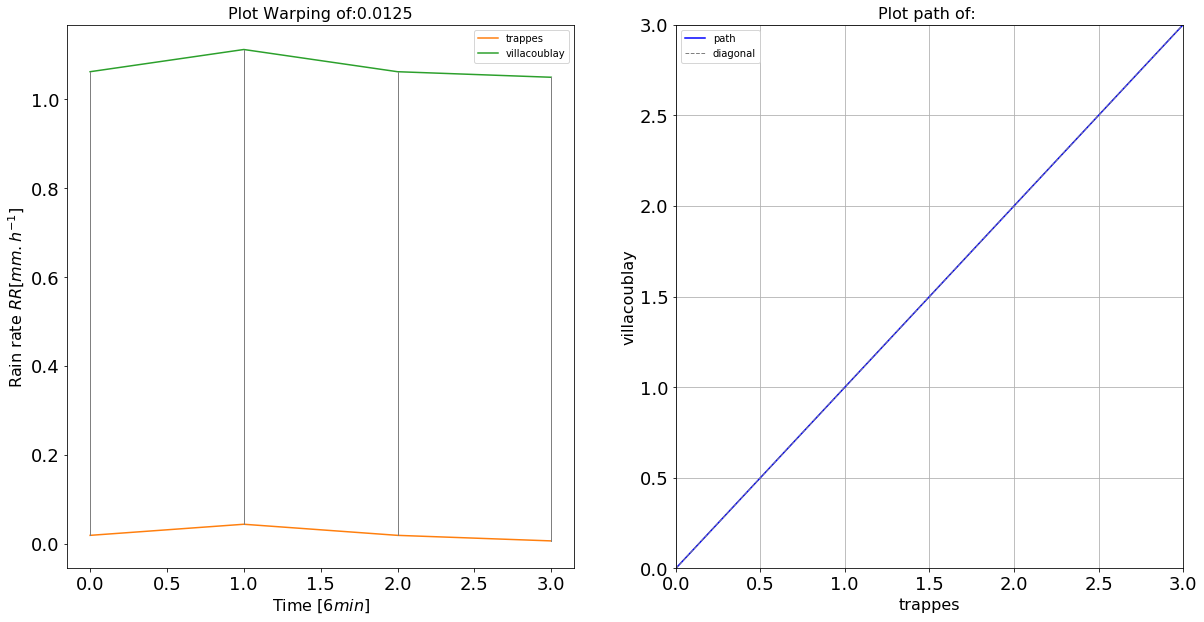

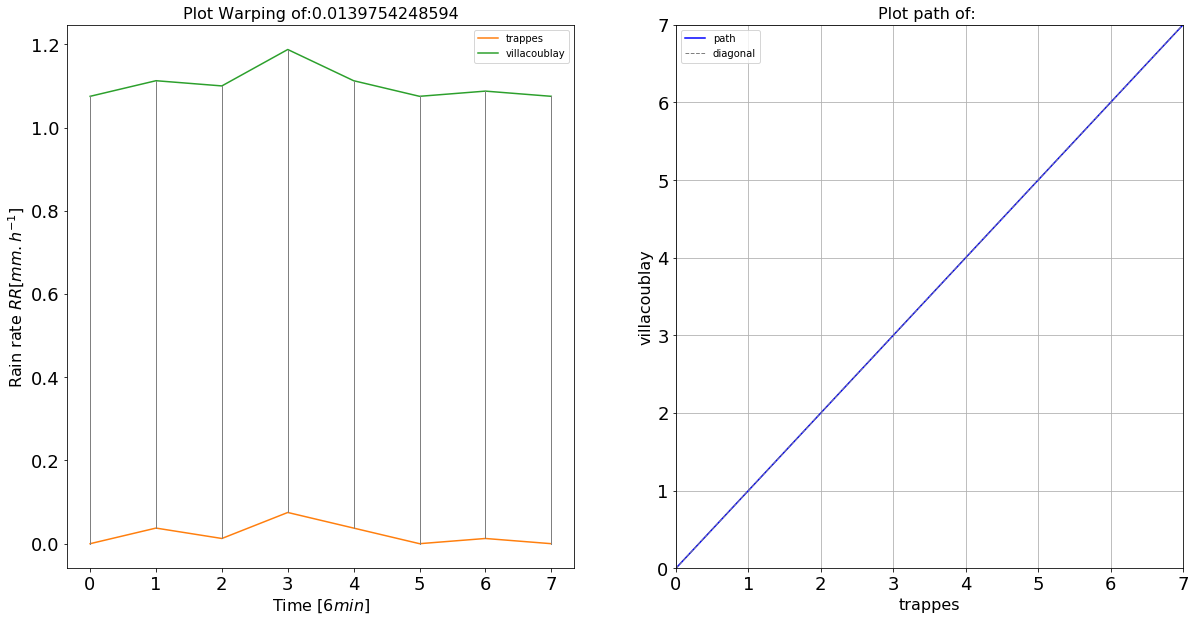

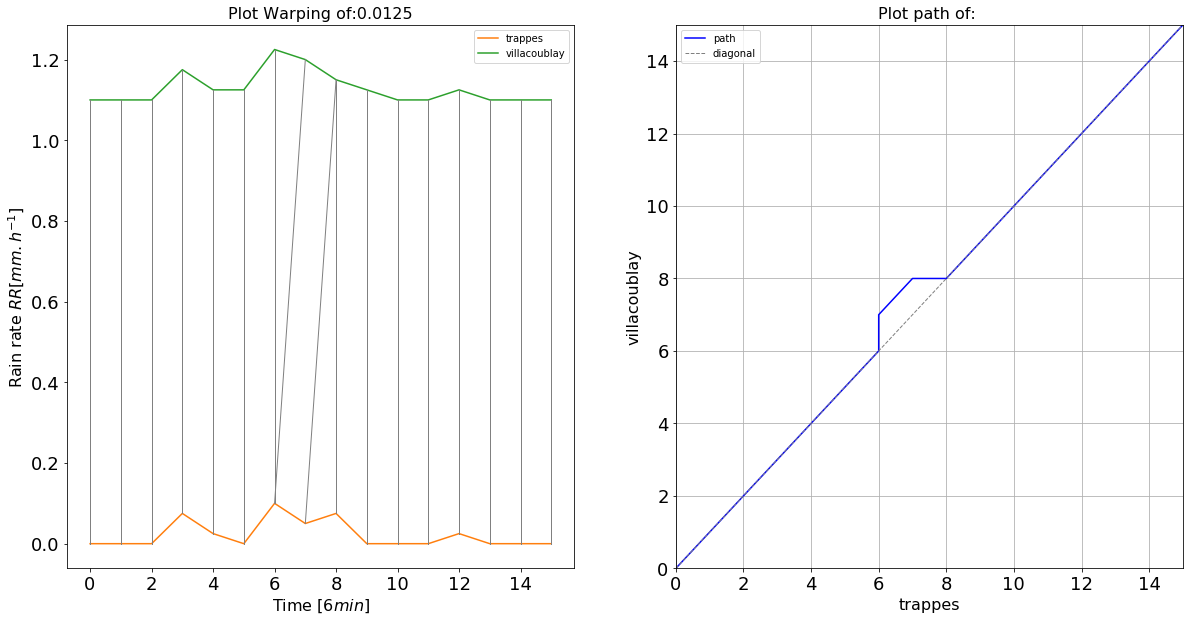

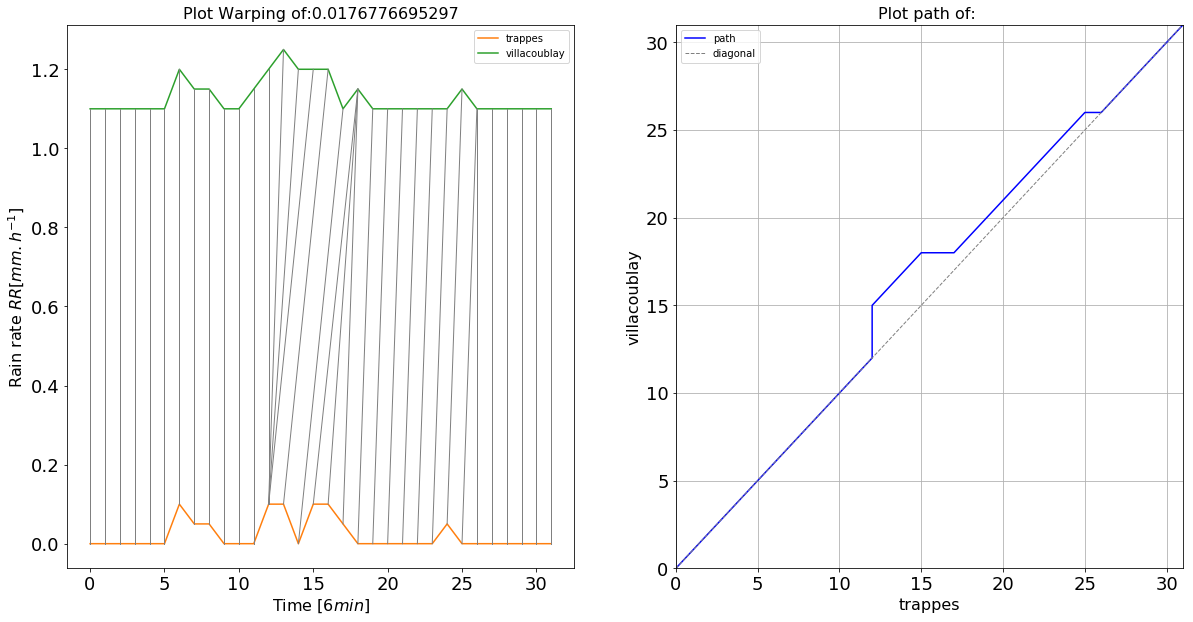

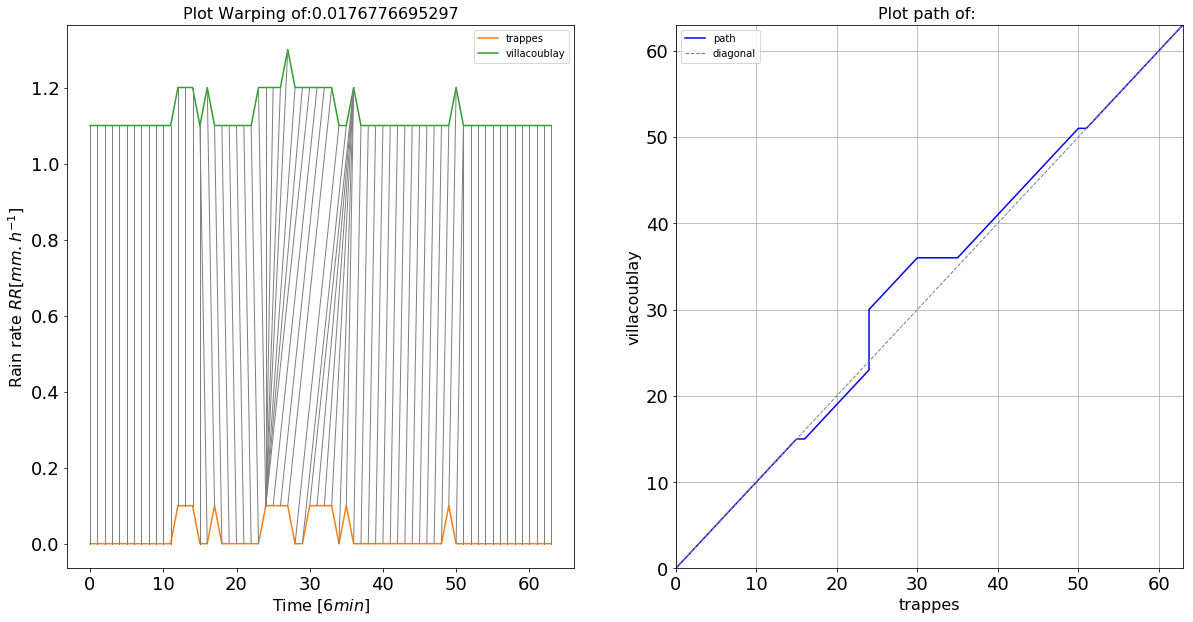

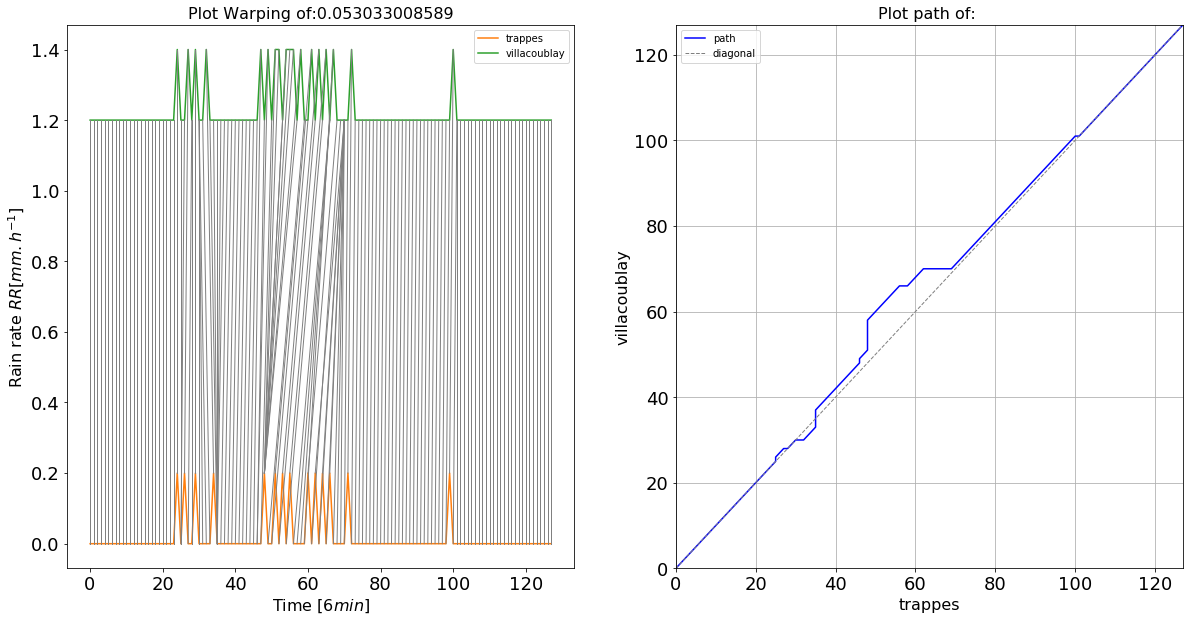

In [18]:
# l'appel de la fonction iddtw avec 5 arguments en spécifiant plot_links=True,plot_path=True, 
# affiche la dissimilarité à différentes échelles  
# de plus elle retourne la mesure de dissimilarité et le path à l'echelle fine.
distance_IMSDTW_r1, path_IMSDTW_r1 =  IMSDTW.iddtw(X,Y,radius=1,plot_links=True,plot_path=True)

#### Discussion des résultats de l'IMSDTW avec r=1

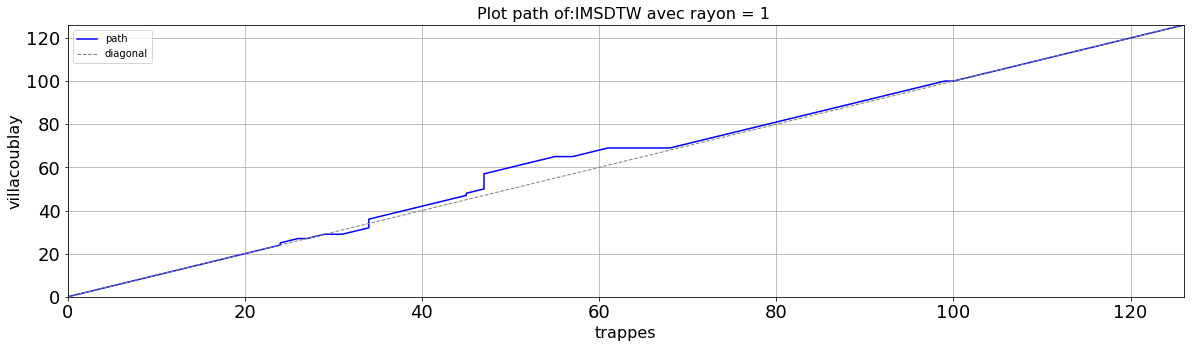

In [21]:
#affichage du path
plt.figure(figsize=(20,5))
IMS_Tools.plot_path("IMSDTW avec rayon = 1 ",path_IMSDTW_r1)
plt.show()

Le path s'éloigne un peu de la diagonale, analysons les correspondances :

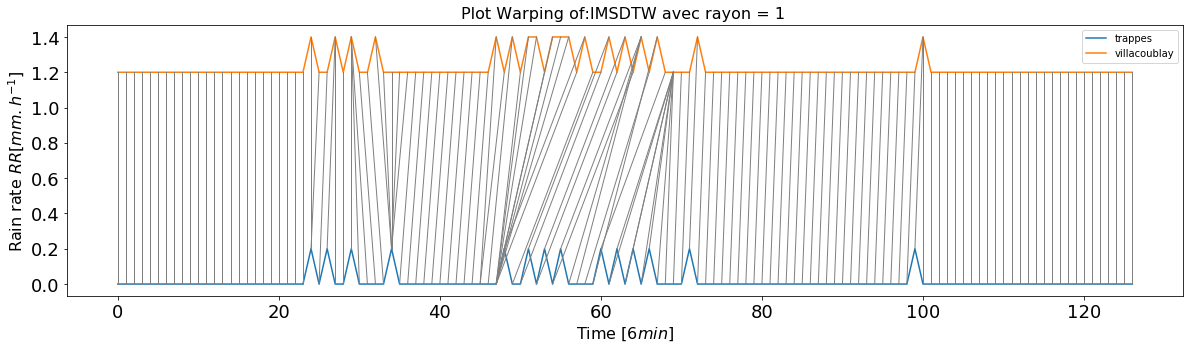

In [20]:
plt.figure(figsize=(20,5))
IMS_Tools.plot_warp(X,Y,"IMSDTW avec rayon = 1 ",path_IMSDTW_r1)

La consédiration d'un rayon=1 autorise le path à s'écarter de la diagonale avec une case à chaque itération ce qui cause les mauvaises associations ( exemple : l'intervalle entre l'instant t=40 et t=60) 

In [19]:
print("la dissimilarité avec l’algorithme IMSDTW avec rayon = 1 : ",np.round(distance_IMSDTW_r1,2))

la dissimilarité avec l’algorithme IMSDTW avec rayon = 1 :  0.05


La dissimilarité reste faible

## 4) Discussion et comparaison des des résultats (DTW, IMSDTW(r=0), IMSDTW(r=1))

Dans cette partie on discute les résultats obtenus par DTW et IMs-DTW (rayon = 0 et 1) selon plusieurs critères: 

### - le temps de calcul :

Le temps de calcul est un facteur important pour la comparaison des séries temporelles de pluie très longues 

In [42]:
print("le temps de calcul avec l’algorithme DTW: ",Time_dtw,"s")
print("le temps de calcul avec l’algorithme IMSDTW avec rayon = 0 : ",Time_IMSr0,"s")
print("le temps de calcul avec l’algorithme IMSDTW avec rayon = 1 : ",Time_IMSr1,"s")

le temps de calcul avec l’algorithme DTW:  0.46 s
le temps de calcul avec l’algorithme IMSDTW avec rayon = 0 :  0.03 s
le temps de calcul avec l’algorithme IMSDTW avec rayon = 1 :  0.07 s


Le temps de calcul avec la DTW est très grand (0.46 $ s $) par rapport a la IMS-DTW ( 0.03 $ s $ pour rayon = 0 et 0.07 $ s $ pour rayon = 1)   
On peut dire que la IMS-DTW est plus rapide comparée à la DTW pour la comparaison des Séries temporelles longues.

### - comparaison des dissimilarités:

In [43]:
print("la distance avec DTW:",np.round(distance_DTW,2))
print("la distance avec l’algorithme IMSDTW avec rayon = 0 :",np.round(distance_IMSDTW_r0,2))
print("la distance avec l’algorithme IMSDTW avec rayon = 1 :",np.round(distance_IMSDTW_r1,2))

la distance avec DTW: 0.02
la distance avec l’algorithme IMSDTW avec rayon = 0 : 0.03
la distance avec l’algorithme IMSDTW avec rayon = 1 : 0.05


<strong>Commentaire : </strong>  la dissimilarité obtenue par la DTW est la plus faible car elle donne le minimum global de la dissimilarité. l'IMS-DTW ( r = 0 et r=1) cherche un minimum local qui respecte les contraintes définies.

### - comparaison des paths:

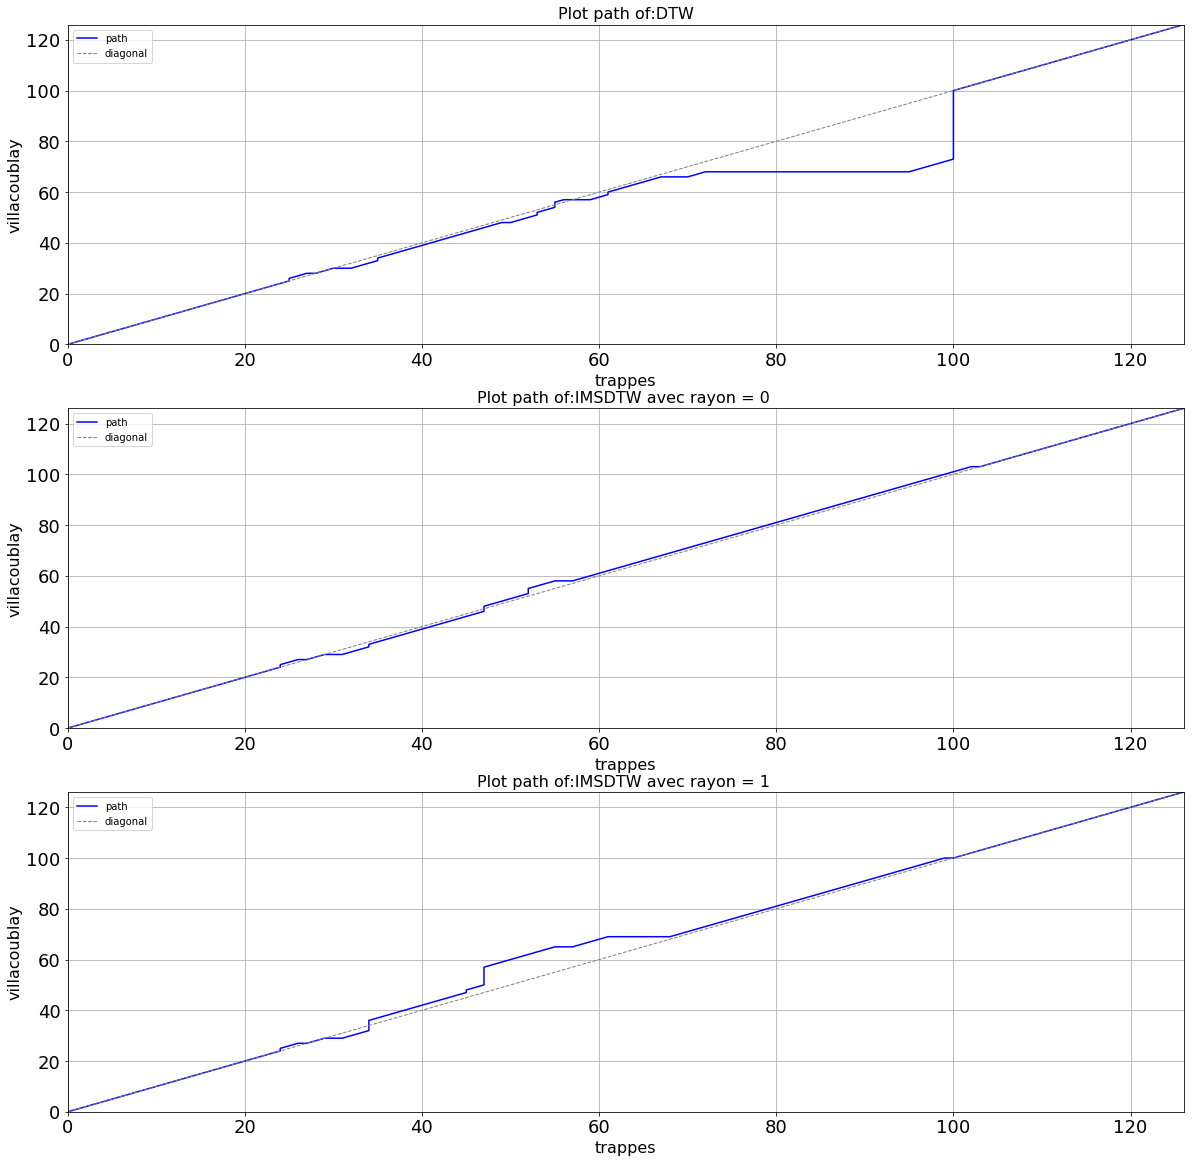

In [49]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(311)
IMS_Tools.plot_path("DTW",path_DTW)
ax2 = plt.subplot(312)
IMS_Tools.plot_path("IMSDTW avec rayon = 0 ",path_IMSDTW_r0)
ax3 = plt.subplot(313)
IMS_Tools.plot_path("IMSDTW avec rayon = 1 ",path_IMSDTW_r1)

Le path trouvé par IMS-DTW avec rayon = 0 est le plus court et le plus proche de diagonale par rapport aux autres méthodes  
Le path de la DTW est très loin de la diagonal 70 et 100 et cela explique l'association des évènements très loin dans l'axe de temps.


### - Comparaison des correspondances:

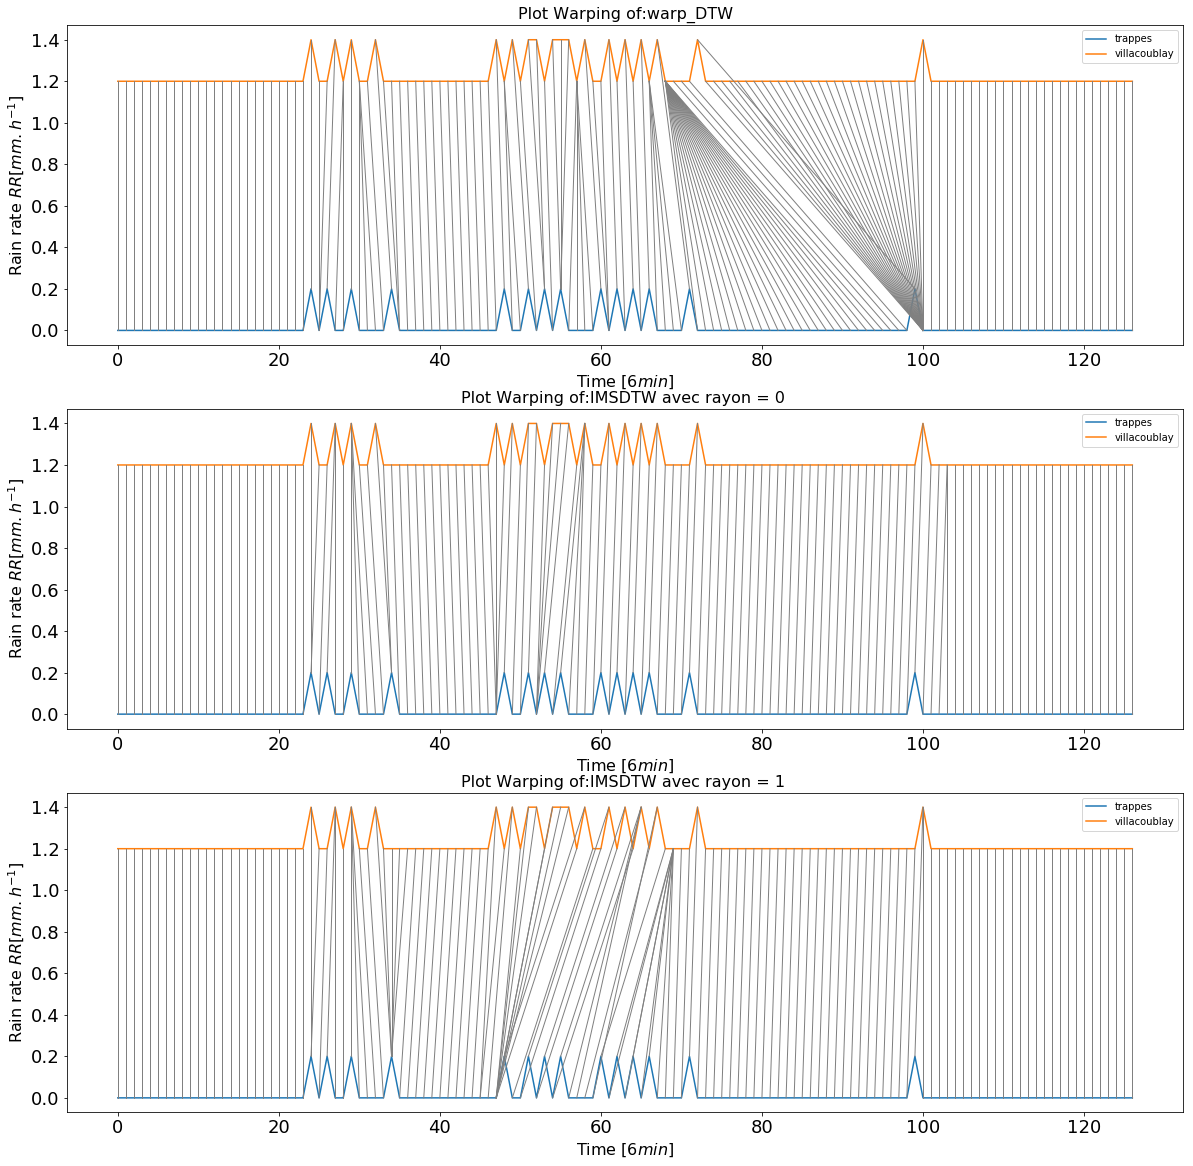

In [47]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(311)
IMS_Tools.plot_warp(X,Y,"warp_DTW",path_DTW)
ax2 = plt.subplot(312)
IMS_Tools.plot_warp(X,Y,"IMSDTW avec rayon = 0 ",path_IMSDTW_r0)
ax3 = plt.subplot(313)
IMS_Tools.plot_warp(X,Y,"IMSDTW avec rayon = 1 ",path_IMSDTW_r1)

on peut voir que les correspondances trouvées par la IMS-DTW avec un rayon = 0 sont les plus cohérents, elle a réussi à associer tous l’évènement de pluie entre eux.  

Le choix rayon=1 pour IMS-DTW a autorisé le path à s'écarter de la diagonale cherchant un minimum local ce que ça cause des mauvaises correspondances entre 40 et 80.  

La DTW n'a pas donné de bonnes correspondances qui respectent les propriétés de la pluie parce qu’elle a associé des évènements de pluie très loin dans l'axe de temps.


## 5) Test de performance des trois méthodes (DTW, IMSDTW(r=0), IMSDTW(r=1)) sur une base de séries temporelles de pluie déformées aléatoirement : 

Dans cette partie on va prendre les Deux Séries précédentes et on applique des déformations sur l'une des deux séries. (le type de déformation considérée est le décalage : on rajoute un nombre aléatoire entre (0-20) des zéros au début, milieu et à la fin de la série et on calcule la dissimilarité).

On répète cette opération N fois (dans ce cas on a pris N=2000) et on garde la dissimilarité et la longueur Normalisée du path  (la longueur du path divisée par la longueur du path diagonal) trouvé par chaque méthode (DTW, IMS-DTW(r=0), IMS-DTW(r=1))

On obtient les histogrammes suivantes: 

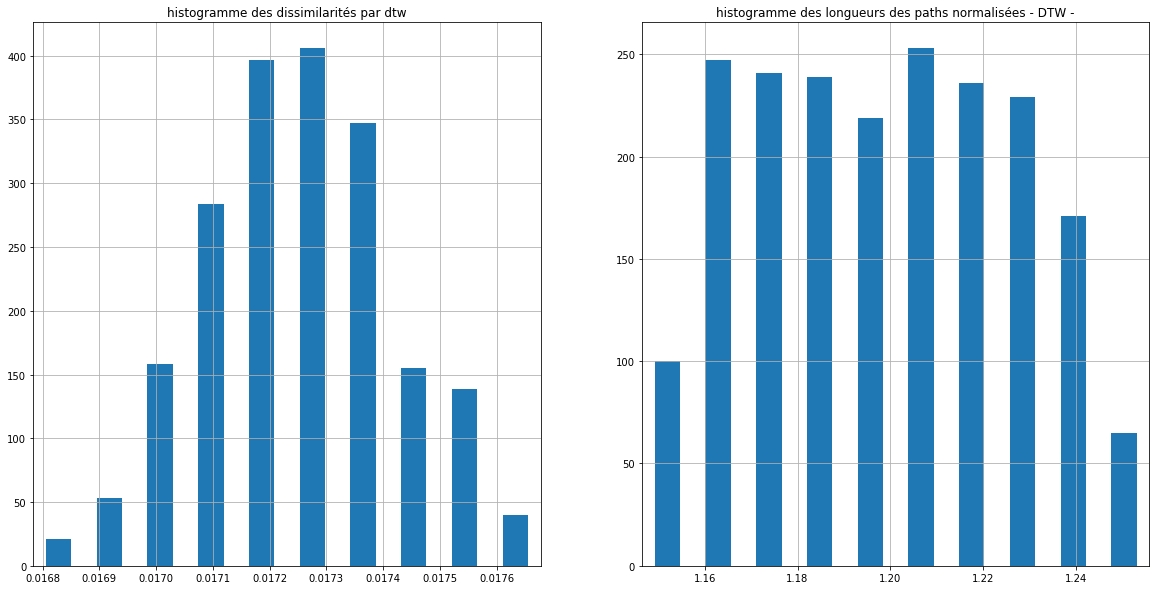

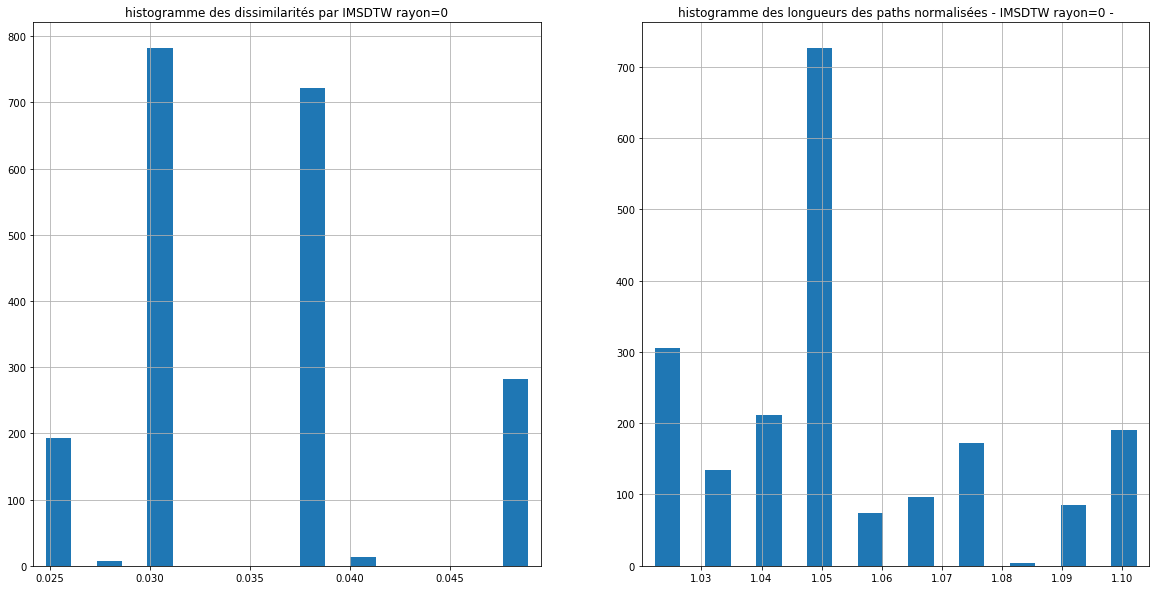

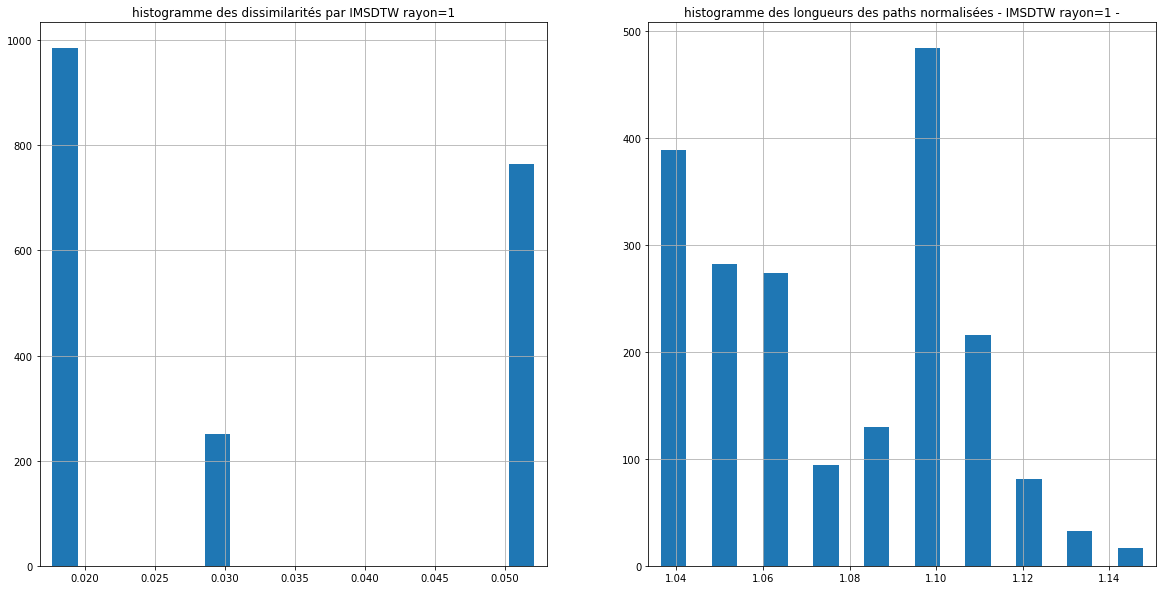

In [22]:
IMS_Tools.test_perf(X,Y,2000)

# Discussion :

les paths:
l'imsdtw avec un rayon =0 donne les paths les plus courts 
l'imsdtw avec un rayon =1 donne des path plus courts que la DTW mais relativment longs que ceux retournés par l'IMS à rayon=0

les dissimilarités:  
-comme prévu la DTW donne les dissimilarités les plus faibles
pour l'IMS-DTW le choix du rayon oriente la recherche du path vers une région spécifique ce qui contraint la recherche du minimum local. 


## Référence

[1] Description des alignements formés par DTW François Petitjean $1^{er}$ décembre 2011